In [12]:
import cebra
from cebra import CEBRA
import cebra.models
import os
from scipy import stats
import tempfile
from pathlib import Path
import torch
from torch import nn
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from matplotlib.colors import rgb2hex
import pickle as pkl
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import sys
sys.path.append('../../../../')
from dataset_load import data_load
from matplotlib.colors import LinearSegmentedColormap
from cebra.models.model import _OffsetModel, ConvolutionalModelMixin

In [13]:
@cebra.models.register("offset200-model") # --> add that line to register the model!
class Offset200Model(_OffsetModel, ConvolutionalModelMixin):

    def __init__(self, num_neurons, num_units, num_output, normalize=True):
        super().__init__(
            
            nn.Conv1d(num_neurons, num_units, 101),
            nn.GELU(),
            nn.Conv1d(num_units, num_units, 21),
            nn.GELU(),
            nn.Conv1d(num_units, num_units, 21),
            nn.GELU(),
            nn.Conv1d(num_units, num_units, 21),
            nn.GELU(),
            nn.Conv1d(num_units, num_units, 21),
            nn.GELU(),
            nn.Conv1d(num_units, num_output, 20),
            num_input=num_neurons,
            num_output=num_output,
            normalize=normalize,
        )

    # ... and you can also redefine the forward method,
    # as you would for a typical pytorch model

    def get_offset(self) -> cebra.data.datatypes.Offset:
        return cebra.data.Offset(100, 100)

In [4]:
skipdates = ["220818", "220819"]
input_folder = "/sc-projects/sc-proj-cc15-ag-wenger-retune/data_kinematic_states_neural/"
VICON_FS = 200
variables_to_drop = ["ANIMAL_ID", "CONDITION", "RUN", "DATE", "EVENT", "ECOG_LEFT_fooof_a_knee", "ECOG_RIGHT_fooof_a_knee"]

In [5]:
def animal_to_number(animal_list):
    unique = np.unique(animal_list)
    number_dict = dict()
    number_list = []
    count = 0
    for a in unique:
        number_dict[a] = count
        count+=1
    for a in animal_list:
        number_list.append(number_dict[a])
    return np.asarray(number_list)

In [6]:
data_dict = data_load(input_folder, variables_to_drop, skipdates)

x_pd = data_dict["X_pd"]
y_pd = data_dict["y_pd"]
animals_id_pd = data_dict["animals_id_pd"]

x_h = data_dict["X_h"]
y_h = data_dict["y_h"]
animals_id_h = data_dict["animals_id_h"]

No file found for 230425 NWE00161 02
No file found for 230425 NWE00161 08
No file found for 230425 NWE00160 04
No file found for 230425 NWE00160 03
No file found for 230425 NWE00164 21


In [8]:
pwd

'/home/garullie/CEBRA_analysis/CEBRA_train/higher_offset/full_run/main_plot'

In [14]:
loaded_cebra_model = cebra.CEBRA.load("../models/neural_full_pd.pt")

<Axes: xlabel='Steps', ylabel='InfoNCE Loss'>

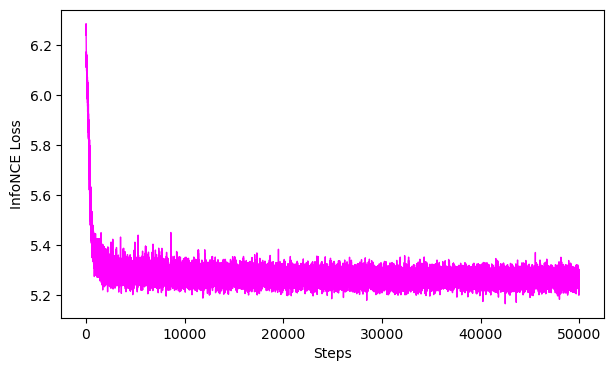

In [15]:
cebra.plot_loss(loaded_cebra_model)

In [16]:
embedding = loaded_cebra_model.transform(x_pd.iloc[:, 36:])

In [17]:
colors = ["cyan", "#2e2d4d", "m"]

In [18]:
colors = ["cyan", "#2e2d4d", "m"]
n_bins = [0, 1, 2]  # Discretizes the interpolation into bins
cmap_name = 'neurokin'
cmap = LinearSegmentedColormap.from_list(cmap_name, colors)

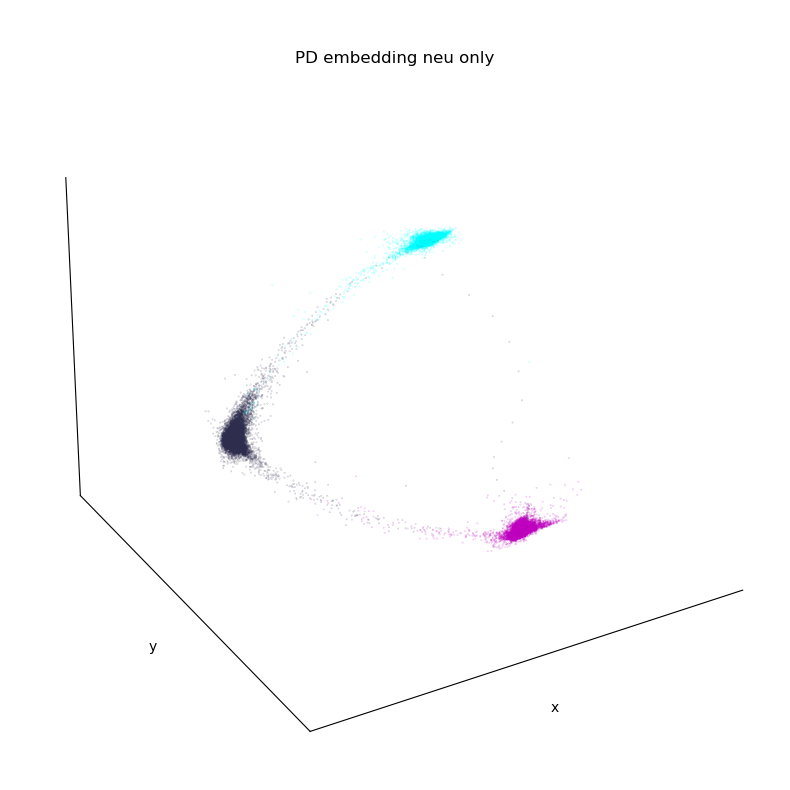

In [38]:
ax = cebra.plot_embedding(embedding=embedding, embedding_labels=y_pd, title="PD embedding neu only", cmap=cmap, figsize=(10,10))
ax.set_zlim(-1, 1)
ax.set_xlim(1, -1)
ax.set_ylim(-1, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.azim = -120
ax.set_xlabel("x")
ax.set_ylabel("y")
#ax.elev = 30
#ax.axis("off")
plt.savefig("cebra_neural_full_ax.png", transparent=True, dpi=300)
#plt.savefig("cebra_neural_full.svg", transparent=True, dpi=100)

In [21]:
loaded_cebra_model_h = cebra.CEBRA.load("../models/neural_full_h.pt")
embedding_h = loaded_cebra_model_h.transform(x_h.iloc[:, 36:])

<Axes: xlabel='Steps', ylabel='InfoNCE Loss'>

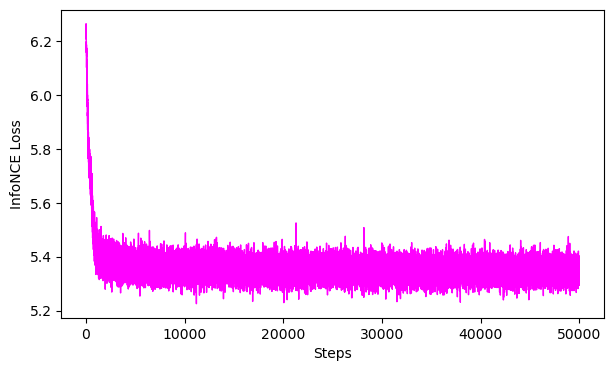

In [22]:
cebra.plot_loss(loaded_cebra_model_h)

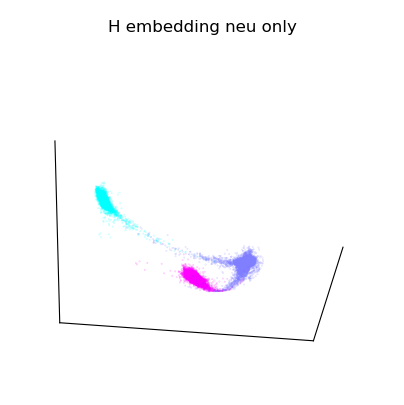

In [23]:
ax = cebra.plot_embedding(embedding=embedding_h, embedding_labels=y_h, title="H embedding neu only")
ax.set_zlim(-1, 1)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.azim = 190
ax.elev = 20

In [24]:
loaded_cebra_model_h_kin = cebra.CEBRA.load("../models/kinematics_full_h.pt")
embedding_h_kin = loaded_cebra_model_h_kin.transform(x_h.iloc[:, :36])

<Axes: xlabel='Steps', ylabel='InfoNCE Loss'>

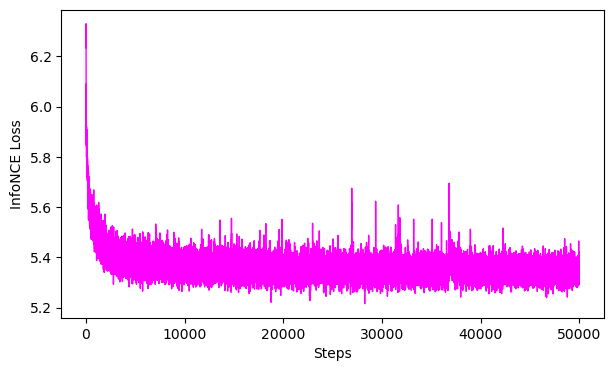

In [25]:
cebra.plot_loss(loaded_cebra_model_h_kin)

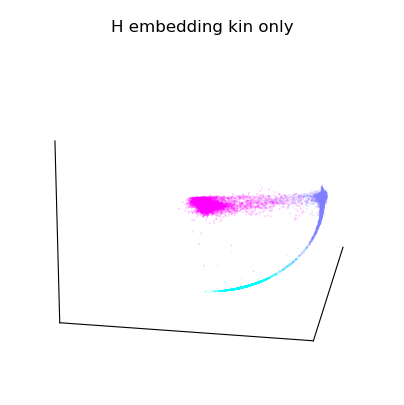

In [26]:
ax = cebra.plot_embedding(embedding=embedding_h_kin, embedding_labels=y_h, title="H embedding kin only")
ax.set_zlim(-1, 1)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.azim = 190
ax.elev = 20

In [27]:
loaded_cebra_model_kin = cebra.CEBRA.load("../models/kinematics_full_pd.pt")
embedding_kin = loaded_cebra_model_kin.transform(x_pd.iloc[:, :36])

<Axes: xlabel='Steps', ylabel='InfoNCE Loss'>

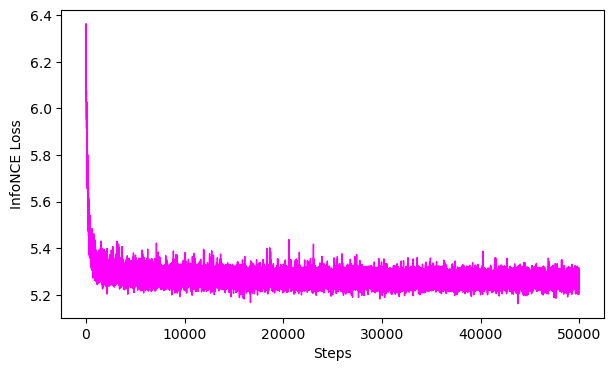

In [28]:
cebra.plot_loss(loaded_cebra_model_kin)

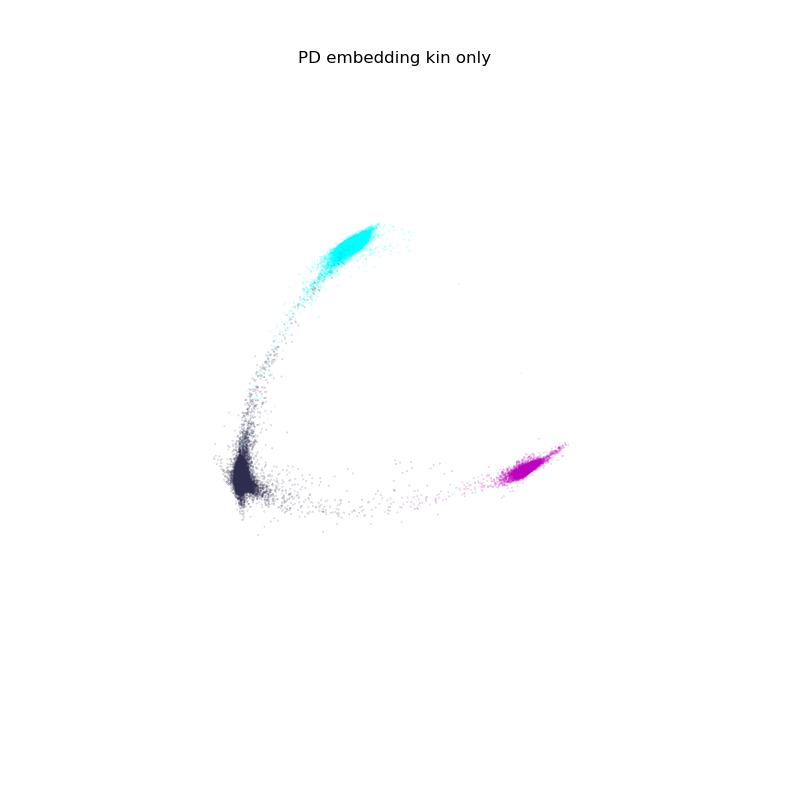

In [29]:
ax = cebra.plot_embedding(embedding=embedding_kin, embedding_labels=y_pd, title="PD embedding kin only", cmap=cmap,  figsize=(10,10))
ax.set_zlim(-1, 1)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.azim = 200
ax.elev = 30
ax.roll = 30
ax.axis("off")
plt.savefig("cebra_kinematics_full.png", transparent=True, dpi=300)
#plt.savefig("cebra_kinematics_full.svg", transparent=True, dpi=100)

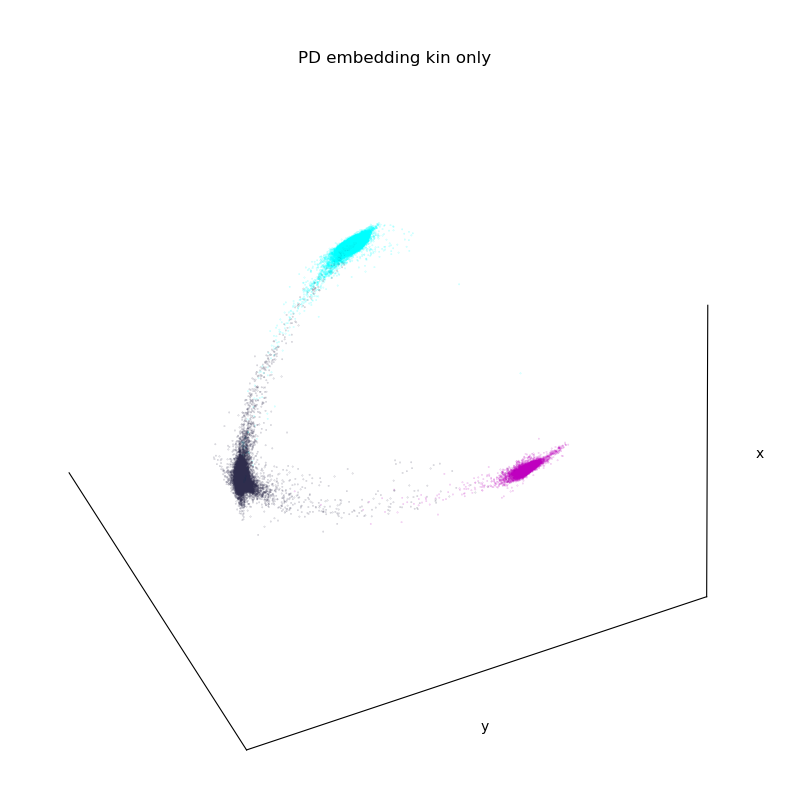

In [39]:

ax = cebra.plot_embedding(embedding=embedding_kin, embedding_labels=y_pd, title="PD embedding kin only", cmap=cmap,  figsize=(10,10))
ax.set_zlim(-1, 1)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.azim = 200
ax.elev = 30
ax.roll = 30
ax.set_xlabel("x")
ax.set_ylabel("y")
#ax.elev = 30
#ax.axis("off")
plt.savefig("cebra_kinematic_full_ax.png", transparent=True, dpi=300)